In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
import keras

Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('../CheXpert-v1.0-small/train.csv')

In [3]:
train_df = train_df[train_df['Frontal/Lateral']=='Frontal']

In [4]:
train_df.shape[0]

191027

In [5]:
train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [6]:
classes = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity' ,
                   'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax',
                   'Pleural Effusion', 'Pleural Other', 'Fracture','Support Devices']

In [7]:
train_dfc = train_df[classes]

In [30]:
train_dfc.columns

Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

In [9]:
batch = train_df.iloc[1:4]

In [15]:
import cv2

In [41]:
img = Image.open('../CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg')   

In [42]:
img.size

(389, 320)

In [43]:
img =  img.resize((224,224), Image.ANTIALIAS)

In [44]:
img.size

(224, 224)

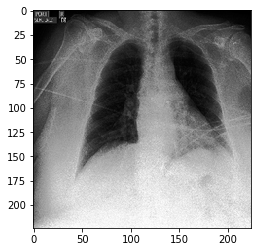

In [45]:
plt.imshow(img)

In [57]:
img2 =np.stack((img,)*3, axis=-1)

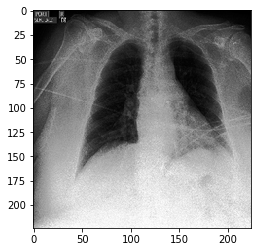

In [58]:
plt.imshow(img2)

In [38]:
train_file = '../CheXpert-v1.0-small/train.csv'
data_dir = '../'
dg = DataGenerator(train_file, classes, data_dir)